In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_news = pd.read_csv('datasets/news_sp_500.csv')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302334 entries, 0 to 302333
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  302334 non-null  int64  
 1   Unnamed: 0    302333 non-null  float64
 2   id            302333 non-null  float64
 3   author        302334 non-null  object 
 4   created       302334 non-null  object 
 5   updated       302334 non-null  object 
 6   title         302330 non-null  object 
 7   teaser        114470 non-null  object 
 8   body          238832 non-null  object 
 9   url           302227 non-null  object 
 10  image         302227 non-null  object 
 11  channels      302227 non-null  object 
 12  stocks        302227 non-null  object 
 13  tags          302227 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 32.3+ MB


In [11]:
df_news['title'] = df_news['title'].astype(str)
df_news['body'] = df_news['body'].astype(str)

In [3]:
df_news['text_length'] = df_news['body'].apply(lambda x: len(x) if type(x) is str else 0)
df_news['word_count'] = df_news['body'].apply(lambda x: len(x.split()) if type(x) is str else 0)
df_news.describe()

,Unnamed: 0.1,Unnamed: 0,id,text_length,word_count
count,302334.000000,302333.000000,3.023330e+05,302334.000000,302334.000000
mean,151167.126099,6242.588837,1.545371e+07,1577.255370,249.290619
std,87277.536396,7901.732872,1.053446e+07,3079.688133,482.221302
min,0.000000,0.000000,1.090000e+02,0.000000,0.000000
25%,75583.250000,1178.000000,5.418559e+06,10.000000,1.000000
50%,151166.500000,3020.000000,1.373189e+07,867.000000,136.000000
75%,226749.750000,7660.000000,2.507397e+07,2210.000000,354.000000
max,302822.000000,40953.000000,3.549779e+07,345736.000000,57760.000000


/var/folders/8v/ps3k66h11hjf_56rkxfbt3tm0000gn/T/ipykernel_77571/127266185.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_news['word_count'],color='g',shade=True)


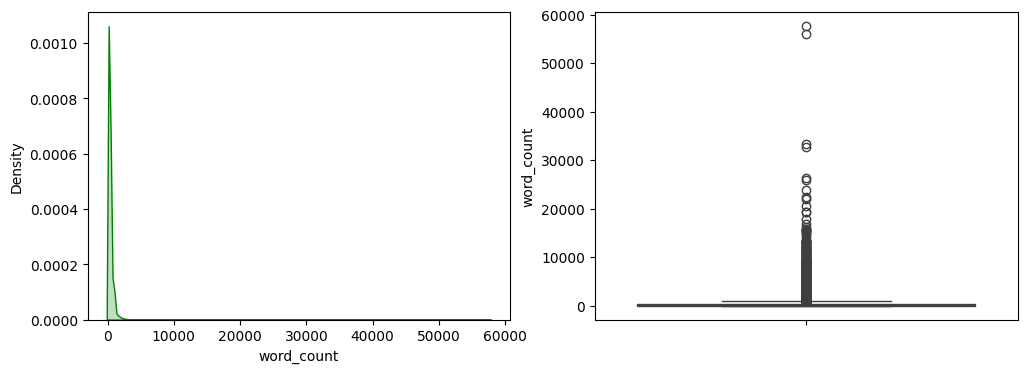

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_news['word_count'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df_news['word_count'])
plt.show()

/var/folders/8v/ps3k66h11hjf_56rkxfbt3tm0000gn/T/ipykernel_77571/127266185.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_news['word_count'],color='g',shade=True)


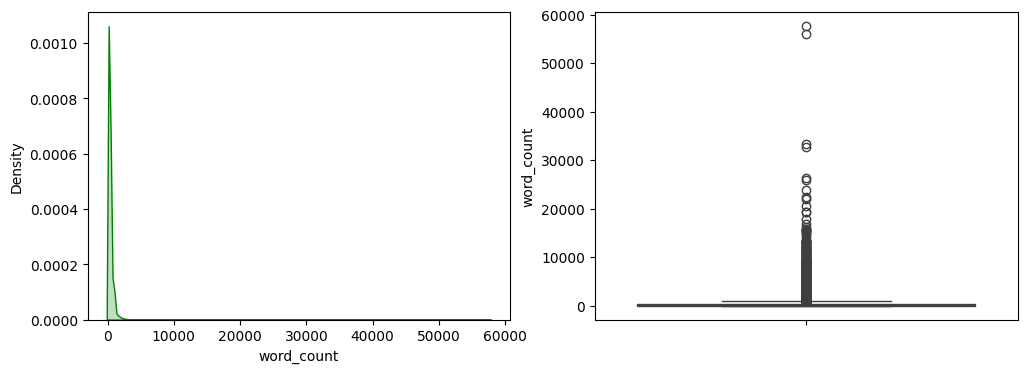

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_news['word_count'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df_news['word_count'])
plt.show()

In [6]:
print("Skew: {}".format(df_news['word_count'].skew()))
print("Kurtosis: {}".format(df_news['word_count'].kurtosis()))


Skew: 22.60899006647932
Kurtosis: 1660.2983766739997


In [7]:
from scipy.stats import zscore

y_outliers = df_news[abs(zscore(df_news['word_count'])) >= 3 ]
y_outliers

,Unnamed: 0.1,Unnamed: 0,id,author,created,updated,title,teaser,body,url,image,channels,stocks,tags,text_length,word_count
112,112,112.0,504570.0,Benzinga,"Fri, 01 Oct 2010 18:15:33 -0400","Fri, 01 Oct 2010 18:15:33 -0400","Income, Spending and Savings All Rise - Analys...",NaN,"In August, Personal Income rose 0.5% -- a nice...",https://www.benzinga.com/node/504570,[],[],"[{'name': 'CSCO'}, {'name': 'MSFT'}, {'name': ...","[{'name': 'Communications Equipment'}, {'name'...",12567,2154
176,176,176.0,527619.0,Benzinga,"Thu, 14 Oct 2010 08:00:26 -0400","Sun, 17 Oct 2010 20:33:08 -0400",Sizemore Capital Management 3rd Quarter 2010 L...,NaN,The following is Sizemore Capital Management L...,https://www.benzinga.com/node/527619,[],[],"[{'name': 'ABV'}, {'name': 'AMJ'}, {'name': 'B...","[{'name': 'Brewers'}, {'name': 'Consumer Stapl...",11714,1921
185,185,185.0,532043.0,Benzinga,"Tue, 19 Oct 2010 09:06:29 -0400","Tue, 19 Oct 2010 09:06:29 -0400",Off to a Strong Start - Earnings Trends,NaN,Key Points:\n\nOnly 48 firms have reported 3Q ...,https://www.benzinga.com/node/532043,[],[],"[{'name': 'GCI'}, {'name': 'KFT'}, {'name': 'K...","[{'name': 'Aerospace & Defense'}, {'name': 'Co...",42375,6390
213,213,213.0,550243.0,Benzinga,"Mon, 25 Oct 2010 15:33:35 -0400","Mon, 25 Oct 2010 15:33:35 -0400",Another GREAT Earnings Season - Earnings Trends,NaN,"Key Points:\n\nReports rolling in fast: 159, o...",https://www.benzinga.com/node/550243,[],[],"[{'name': 'GCI'}, {'name': 'KFT'}, {'name': 'K...","[{'name': 'Aerospace & Defense'}, {'name': 'Co...",33064,4715
405,405,405.0,677137.0,Benzinga,"Tue, 07 Dec 2010 17:25:22 -0400","Wed, 08 Dec 2010 17:43:36 -0400",Why Bloomberg Invests in Media - Kevin Krim - ...,NaN,Today we're at the IGNITION Conference. We're ...,https://www.benzinga.com/node/677137,[],"[{'name': 'Movers & Shakers'}, {'name': 'Gener...","[{'name': 'DIS'}, {'name': 'LOOK'}, {'name': '...","[{'name': 'Benzinga Podcast'}, {'name': 'Bloom...",11188,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301802,301942,382.0,14628483.0,Lisa Levin,"Mon, 21 Oct 2019 11:12:35 -0400","Mon, 21 Oct 2019 11:12:35 -0400",Stocks That Hit 52-Week Lows On Monday,NaN,"Before 10 a.m. ET Monday, 135 stocks made new ...",https://www.benzinga.com/node/14628483,[],"[{'name': 'News'}, {'name': 'Movers & Shakers'...","[{'name': 'ABNAF'}, {'name': 'AEGY'}, {'name':...","[{'name': '52 Week Lows'}, {'name': '52-Week L...",17923,3010
301946,302204,644.0,21410800.0,Benzinga Insights,"Thu, 03 Jun 2021 10:09:31 -0400","Thu, 03 Jun 2021 10:09:31 -0400","Benzinga's Top Ratings Upgrades, Downgrades Fo...",,"\nUpgrades\n\nAccording to B of A Securities,...",https://www.benzinga.com/analyst-ratings/upgra...,[],"[{'name': 'Upgrades'}, {'name': 'Downgrades'},...","[{'name': 'ADC'}, {'name': 'AIRC'}, {'name': '...",[{'name': 'BZI-Ratings'}],16493,2689
301949,302210,650.0,21474139.0,Benzinga Insights,"Tue, 08 Jun 2021 10:07:36 -0400","Tue, 08 Jun 2021 10:07:37 -0400","Benzinga's Top Ratings Upgrades, Downgrades Fo...",,"\nUpgrades\n\nAccording to Seaport Global, th...",https://www.benzinga.com/analyst-ratings/upgra...,[],"[{'name': 'Upgrades'}, {'name': 'Downgrades'},...","[{'name': 'ADSK'}, {'name': 'ANF'}, {'name': '...",[{'name': 'BZI-Ratings'}],13549,2268
301999,302287,727.0,23858097.0,Benzinga Insights,"Wed, 03 Nov 2021 10:02:20 -0400","Wed, 03 Nov 2021 10:02:20 -0400","Benzinga's Top Ratings Upgrades, Downgrades Fo...",,\nUpgrades\n\nBenchmark upgraded the previous...,https://www.benzinga.com/analyst-ratings/upgra...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...","[{'name': 'Upgrades'}, {'name': 'Downgrades'},...","[{'name': 'AQUA'}, {'name': 'ATVI'}, {'name': ...",[{'name': 'BZI-Ratings'}],13858,2322


<Axes: >

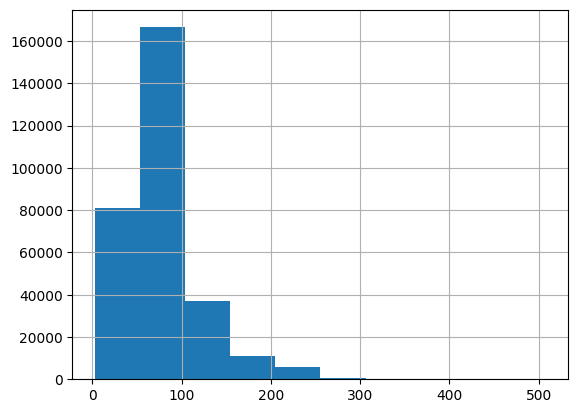

In [8]:
df_news['title'].str.len().hist()


<Axes: >

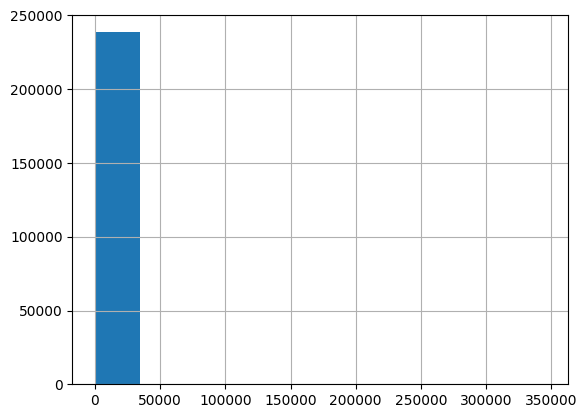

In [9]:
df_news['body'].str.len().hist()


<Axes: >

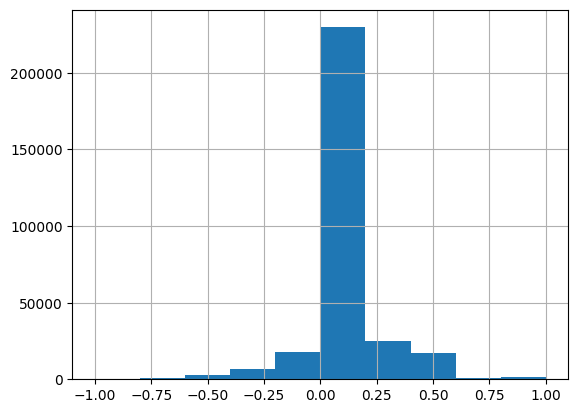

In [12]:
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

df_news['polarity_score']=df_news['title'].apply(lambda x : polarity(x))
df_news['polarity_score'].hist()


<BarContainer object of 3 artists>

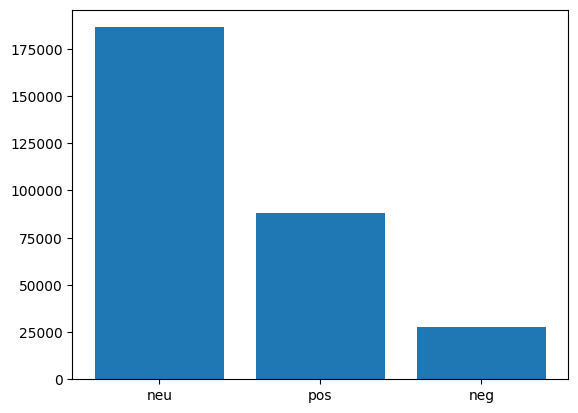

In [13]:

def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df_news['polarity']=df_news['polarity_score'].map(lambda x: sentiment(x))
plt.bar(df_news.polarity.value_counts().index, df_news.polarity.value_counts())

<Axes: >

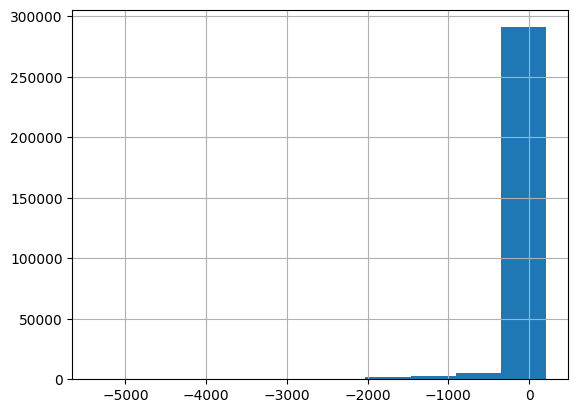

In [16]:
from textstat import flesch_reading_ease

df_news['body'].apply(lambda x : flesch_reading_ease(x)).hist()